In [1]:
import pyvisa as visa
import time
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
import math

In [2]:
rm = visa.ResourceManager()

In [3]:
rm.list_resources()

('USB0::0x0699::0x0363::C108012::INSTR',
 'ASRL1::INSTR',
 'ASRL2::INSTR',
 'ASRL3::INSTR',
 'ASRL10::INSTR')

In [4]:
osci=rm.open_resource('USB0::0x0699::0x0363::C108012::INSTR')
print(osci.query('*IDN?'))

TEKTRONIX,TDS 1002B,C108012,CF:91.1CT FV:v22.13



In [9]:
def save1(name,folder,autos=False):
    time_s = time.time()

    if autos:
        osci.write('AUTOS exec')
        time.sleep(6)

    osci.write('DAT:SOU CH1')
    xze, xin = osci.query_ascii_values('WFMPRE:XZE?;XIN?', separator=';')
    osci.write('ACQ:STATE STOP')
    yze1, ymu1, yoff1 = osci.query_ascii_values('WFMPRE:YZE?;YMU?;YOFF?;', separator=';')
    
    osci.write('DAT:ENC RPB')
    osci.write('DAT:WID 1')

    osci.write("DAT:SOU CH1")
    data1 = osci.query_binary_values('CURV?', datatype='B', container=np.array)
    tiempo = xze + np.arange(len(data1)) * xin
    data1v = (data1 - yoff1) * ymu1 + yze1

    osci.write('ACQ:STATE RUN')

    df = pd.DataFrame({'t':tiempo,'V1':data1v,})
    plt.plot(df.t,df.V1)

    plt.xlabel('t [s]')
    plt.ylabel('V [V]')
    plt.grid()
    plt.show()
    df.to_csv(f'{folder}/{name}.csv',index=False)
    
def save0(name,folder,autos=False):
    time_s = time.time()

    if autos:
        osci.write('AUTOS exec')
        time.sleep(6)

    osci.write('DAT:SOU CH1')
    xze, xin = osci.query_ascii_values('WFMPRE:XZE?;XIN?', separator=';')
    osci.write('ACQ:STATE STOP')
    yze1, ymu1, yoff1 = osci.query_ascii_values('WFMPRE:YZE?;YMU?;YOFF?;', separator=';')
    
    osci.write('DAT:ENC RPB')
    osci.write('DAT:WID 1')

    osci.write("DAT:SOU CH1")
    data1 = osci.query_binary_values('CURV?', datatype='B', container=np.array)
    tiempo = xze + np.arange(len(data1)) * xin
    data1v = (data1 - yoff1) * ymu1 + yze1

    osci.write('ACQ:STATE RUN')

    df = pd.DataFrame({'t':tiempo,'V1':data1v,})
    df.to_csv(f'{folder}/{name}.csv',index=False)

In [11]:
def plot():
    time_s = time.time()

    osci.write('DAT:SOU CH1')
    xze, xin = osci.query_ascii_values('WFMPRE:XZE?;XIN?', separator=';')
    osci.write('ACQ:STATE STOP')
    yze1, ymu1, yoff1 = osci.query_ascii_values('WFMPRE:YZE?;YMU?;YOFF?;', separator=';')
    
    osci.write('DAT:ENC RPB')
    osci.write('DAT:WID 1')

    osci.write("DAT:SOU CH1")
    data1 = osci.query_binary_values('CURV?', datatype='B', container=np.array)
    tiempo = xze + np.arange(len(data1)) * xin
    data1v = (data1 - yoff1) * ymu1 + yze1

    osci.write('ACQ:STATE RUN')

    df = pd.DataFrame({'t':tiempo,'V1':data1v,})
    plt.plot(df.t,df.V1,label='Datos')

    plt.xlabel('t [s]')
    plt.ylabel('V [V]')
    plt.grid()
    plt.tight_layout()
#    plt.show()

In [73]:
for i in range(20):
    save0(f'{i}','plots/clase2/laser abierto again')

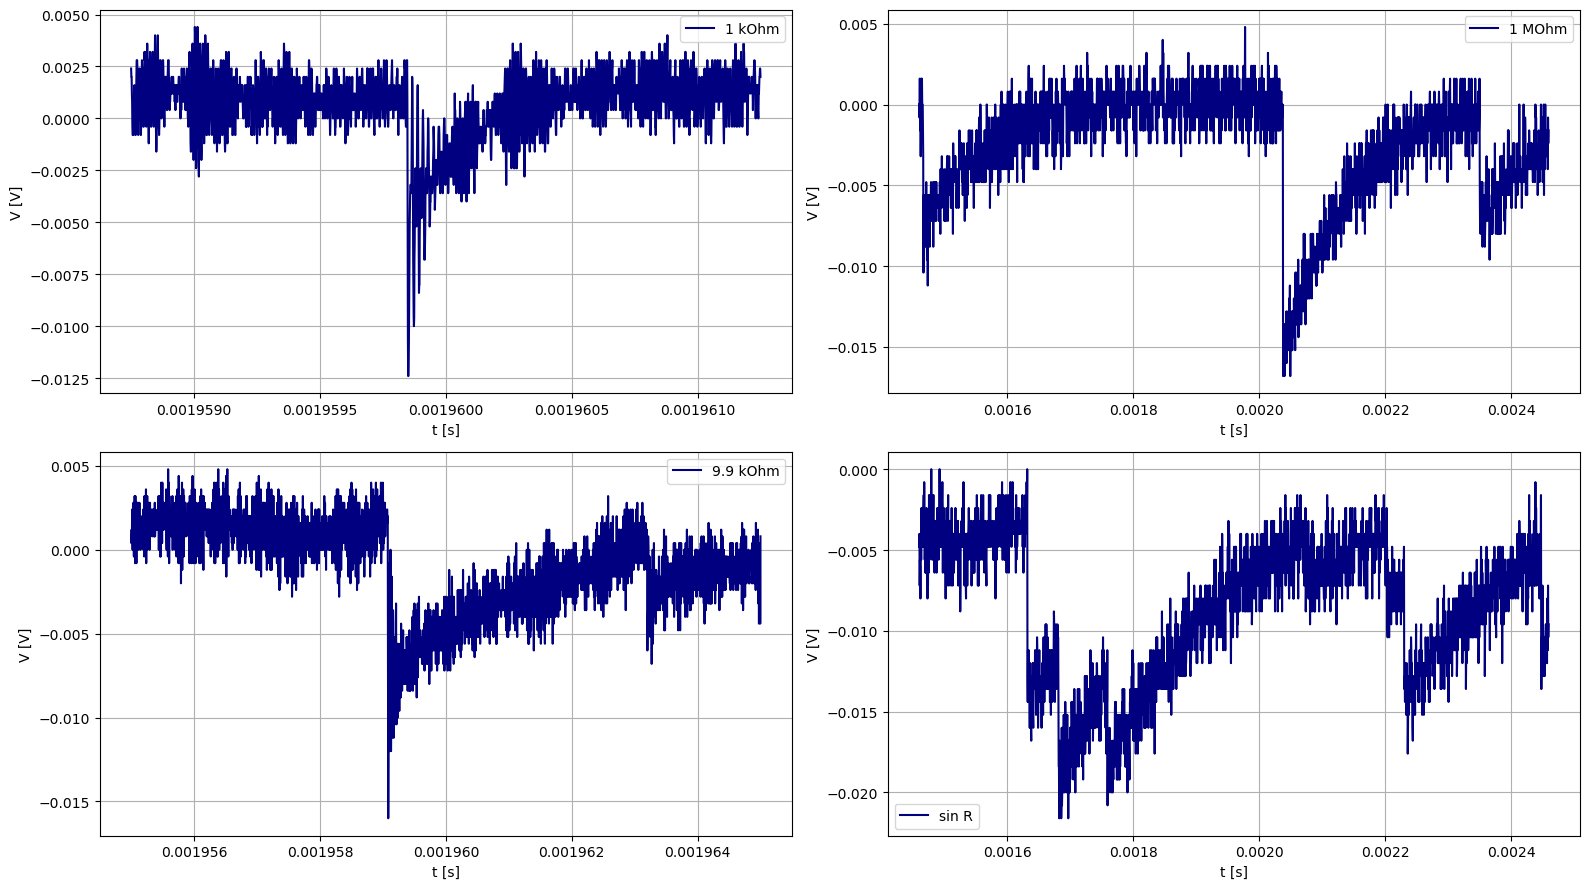

In [69]:
Rs = ['1 kOhm','1 MOhm','9.9 kOhm','sin R']
num = [5,7,0,0]
fig,axs = plt.subplots(2,2,figsize=(16,9),layout='tight')
axs = axs.reshape(-1)

for i in range(len(Rs)):
    df = pd.read_csv(f'plots/clase2/ancho picos/{Rs[i]}/{num[i]}.csv')
    axs[i].plot(df.t,df.V1,'navy',label=Rs[i])
    axs[i].grid()
    axs[i].set_xlabel('t [s]')
    axs[i].set_ylabel('V [V]')
    axs[i].legend()
plt.savefig('plots/imgs/pulsos R.png')

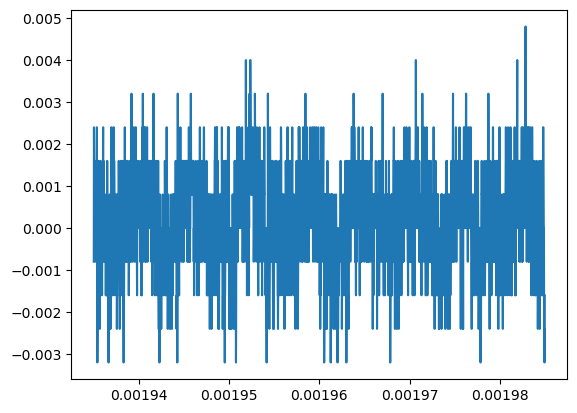

In [50]:
df = pd.read_csv(f'plots/clase2/ancho picos/9.9 kOhm/{25}.csv')
plt.plot(df.t,df.V1)